signal shape: (200,)
amplitude_frequency type: <class 'numpy.ndarray'>
amplitude_frequency shape: (2, 200)
amplitude_frequency
[[ 6.90000000e-01  4.77092122e+00  1.03638985e+02  1.14150832e+00
   2.51197083e+00  3.99426968e+00  2.30749458e+00  1.17823017e+00
   4.46216107e+00  3.73121909e+00  4.61031194e+00  6.24026892e+00
   2.28913254e+00  2.56130810e+00  6.67269337e+00  6.48994615e-01
   3.07909710e+00  3.27353316e+00  3.16168444e+00  3.28416530e+00
   5.62204978e+00  4.37915282e+00  4.43110498e+00  1.94564301e+00
   3.49603174e+00  1.99575609e+00  3.41441978e+00  3.94425540e+00
   2.32745084e+00  3.68934811e+00  2.43544358e+00  1.57700770e+00
   1.50765488e+00  3.46768613e+00  1.11590093e+00  4.17468707e+00
   5.04773452e+00  4.26838987e+00  2.06326340e+00  5.54604113e+00
   3.13682623e+00  7.07721063e-01  7.12818958e+00  7.49522101e+00
   4.32509617e+00  2.15736057e+00  3.24145420e+00  2.78148169e+00
   2.40554173e+00  5.04752990e+00  1.96461192e+00  2.74417546e+00
   3.83979859e+

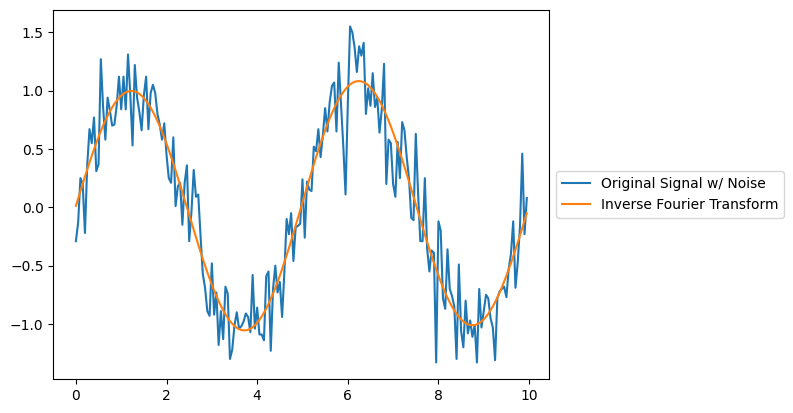

In [122]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

time_step = 0.05
time_vec = np.arange(0, 10, time_step)
period = 5

sine_wave_numerator = 2*np.pi*time_vec
sine_wave_denom = period

noise_reduction_factor = 0.25

signal = np.sin(sine_wave_numerator/sine_wave_denom)
print('signal shape:', signal.shape)
noise = noise_reduction_factor*np.random.randn(time_vec.size)

signal = np.round(signal, 2)
noise = np.round(noise, 2)

signal = signal + noise


signal_fft = fftpack.fft(signal)
amplitude = np.abs(signal_fft)

power = amplitude**2
angle = np.angle(signal_fft)

sample_freq = fftpack.fftfreq(signal.size, d=time_step)

amplitude_frequency = np.array([amplitude, sample_freq])

print("amplitude_frequency type:", type(amplitude_frequency))
print("amplitude_frequency shape:", amplitude_frequency.shape)
print("amplitude_frequency")
print(amplitude_frequency)

peak_amplitude_position = amplitude_frequency[0, :].argmax()

peak_frequency = amplitude_frequency[1, peak_amplitude_position]
print("Set Frequency =", 1/period)
print("Peak Frequency found via Fourier:", peak_frequency)

high_frequency_fft = signal_fft.copy()
high_frequency_fft[np.abs(sample_freq) > peak_frequency] = 0

filtered_signal = fftpack.ifft(high_frequency_fft)


plt.plot(time_vec, signal, label='Original Signal w/ Noise')
plt.plot(time_vec, filtered_signal, label='Inverse Fourier Transform')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


amplitude_frequency type: <class 'numpy.ndarray'>
amplitude_frequency shape: (2, 100)
amplitude_frequency
[[   5.32          1.98287288    6.22162246    2.71894405    2.28461309
     9.78907332    7.55469236    7.60352136    4.62156571    4.21165362
     4.68522654    6.32993885    5.37386072    4.5735732     5.31112605
     2.83585684    4.21172753    2.59509999    5.13357592    4.39714514
     3.9558785     4.3994401     3.82299649    3.58735031    7.92437198
     3.84886996    7.20896999    3.75008139    3.43012485    2.98579827
     4.74429681    7.13531075    7.52856795    8.60284364    3.20734866
     4.58240182    5.04305487    4.87592775    6.35293812    3.67847492
     3.85049676    6.05702679    4.42640359    3.29100313   48.84870613
     1.87129717    3.23811184    6.76421239    3.80314205    4.04652188
     9.06          4.04652188    3.80314205    6.76421239    3.23811184
     1.87129717   48.84870613    3.29100313    4.42640359    6.05702679
     3.85049676    3.67847492 

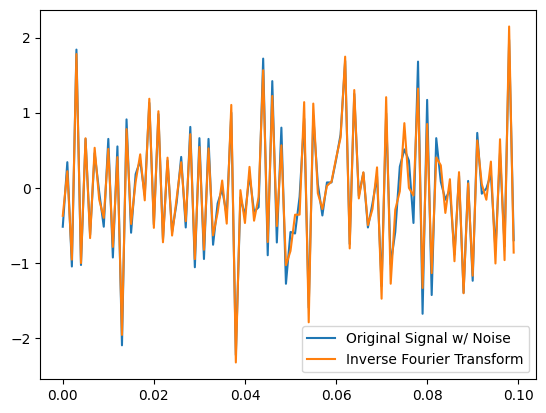

In [120]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

time_step = 0.001
start_time_seconds = 0
end_time_seconds = 0.1
time_vec = np.arange(start_time_seconds, end_time_seconds, time_step)
set_frequency = 440
period = 1/set_frequency
#period = 5

sine_wave_numerator = 2*np.pi*time_vec
sine_wave_denom = period

noise_reduction_factor = 0.5

signal = np.sin(sine_wave_numerator/sine_wave_denom)
noise = noise_reduction_factor*np.random.randn(time_vec.size)

signal = np.round(signal, 2)
noise = np.round(noise, 2)

signal = signal + noise


signal_fft = fftpack.fft(signal)
amplitude = np.abs(signal_fft)

power = amplitude**2
angle = np.angle(signal_fft)

sample_freq = fftpack.fftfreq(signal.size, d=time_step)

amplitude_frequency = np.array([amplitude, sample_freq])

peak_amplitude_position = amplitude_frequency[0, :].argmax()

peak_frequency = amplitude_frequency[1, peak_amplitude_position]

print("amplitude_frequency type:", type(amplitude_frequency))
print("amplitude_frequency shape:", amplitude_frequency.shape)
print("amplitude_frequency")
print(amplitude_frequency)


#print("peak_frequency type:", type(peak_frequency))
#print("peak_frequency shape:", peak_frequency.shape)
#print("peak_frequency")
#print(peak_frequency)
#print("Set Frequency =", 1/period)
#print("Peak Frequency found via Fourier:", peak_frequency)

high_frequency_fft = signal_fft.copy()
high_frequency_fft[np.abs(sample_freq) > peak_frequency] = 0

filtered_signal = fftpack.ifft(high_frequency_fft)


plt.plot(time_vec, signal, label='Original Signal w/ Noise')
plt.plot(time_vec, filtered_signal, label='Inverse Fourier Transform')
plt.legend()


0.2

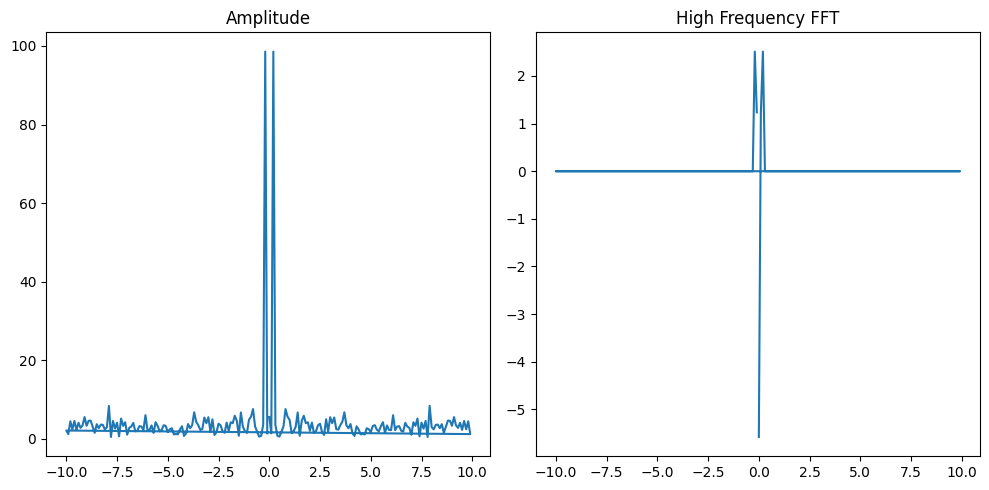

In [78]:

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot
axs[0].plot(sample_freq, amplitude)
axs[0].set_title('Amplitude')

# Plot the second subplot
axs[1].plot(sample_freq, high_frequency_fft)
axs[1].set_title('High Frequency FFT')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [80]:
high_frequency_fft

array([-5.58       -0.j        ,  1.23655579 -0.72790479j,
        2.51157932-98.51430981j,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j        ,
        0.         +0.j        ,  0.         +0.j       